In [50]:
import pandas as pd

In [49]:
df = pd.read_csv('kidney_disease (1).csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [48]:
display(df.head())
df.info()
print(df.isnull().sum())

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [51]:
# df = df.drop('id', axis=1) # Removed this line as 'id' was already dropped

categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

for col in numerical_cols:
    # Convert column to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        if df[col].skew() > 1 or df[col].skew() < -1:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

df_cleaned = df_scaled
display(df_cleaned.head())

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes,classification_ckd\t,classification_notckd
0,-1.727726,-0.205464,0.254214,0.483355,-0.013338,-0.380269,-0.320122,-0.419451,-0.319668,0.040104,...,False,False,True,True,False,False,False,False,False,False
1,-1.719066,-2.623810,-1.972476,0.483355,2.347516,-0.380269,-0.320122,-0.784315,-0.390819,0.040104,...,False,True,False,True,False,False,False,False,False,False
2,-1.710406,0.620313,0.254214,-1.381391,0.773613,2.507853,3.697618,-0.074858,-0.212942,0.040104,...,False,False,True,True,False,True,False,True,False,False
3,-1.701745,-0.205464,-0.488016,-2.313764,2.347516,-0.380269,-0.373337,-0.014047,0.142813,-2.896333,...,False,True,False,True,False,True,True,True,False,False
4,-1.693085,-0.028511,0.254214,-1.381391,0.773613,-0.380269,-0.519679,-0.622154,-0.284093,0.040104,...,False,True,False,True,False,False,False,False,False,False


In [35]:
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().sum() > 0:
        if df[col].skew() > 1 or df[col].skew() < -1:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

df_cleaned = df_scaled
display(df_cleaned.head())

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes,classification_ckd\t,classification_notckd
0,-1.727726,-0.205464,0.254214,0.483355,-0.013338,-0.380269,-0.320122,-0.419451,-0.319668,0.040104,...,False,False,True,True,False,False,False,False,False,False
1,-1.719066,-2.623810,-1.972476,0.483355,2.347516,-0.380269,-0.320122,-0.784315,-0.390819,0.040104,...,False,True,False,True,False,False,False,False,False,False
2,-1.710406,0.620313,0.254214,-1.381391,0.773613,2.507853,3.697618,-0.074858,-0.212942,0.040104,...,False,False,True,True,False,True,False,True,False,False
3,-1.701745,-0.205464,-0.488016,-2.313764,2.347516,-0.380269,-0.373337,-0.014047,0.142813,-2.896333,...,False,True,False,True,False,True,True,True,False,False
4,-1.693085,-0.028511,0.254214,-1.381391,0.773613,-0.380269,-0.519679,-0.622154,-0.284093,0.040104,...,False,True,False,True,False,False,False,False,False,False


In [36]:
display(df_cleaned['classification_ckd\t'].value_counts())

,count
classification_ckd,
False,398
True,2


In [37]:
from imblearn.over_sampling import SMOTE

X = df_cleaned.drop(['classification_ckd\t', 'classification_notckd'], axis=1)
y = df_cleaned['classification_ckd\t']

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

display(y.value_counts())

,count
classification_ckd,
False,398
True,398


In [38]:
from imblearn.over_sampling import SMOTE

X = df_cleaned.drop(['classification_ckd\t', 'classification_notckd'], axis=1)
y = df_cleaned['classification_ckd\t']

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

display(y.value_counts())

,count
classification_ckd,
False,398
True,398


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=1000)
}

trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_resampled, y_resampled)
    trained_models[name] = model
    print(f"{name} trained.")

Training Logistic Regression...
Logistic Regression trained.
Training Decision Tree...
Decision Tree trained.
Training Random Forest...
Random Forest trained.
Training Support Vector Machine...
Support Vector Machine trained.
Training K-Nearest Neighbors...
K-Nearest Neighbors trained.
Training Gradient Boosting...
Gradient Boosting trained.
Training Naive Bayes...
Naive Bayes trained.
Training MLP Classifier...
MLP Classifier trained.


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    except AttributeError:
        roc_auc = "N/A (Model does not support predict_proba)"

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  Confusion Matrix:\n{cm}")
    print(f"  ROC AUC Score: {roc_auc}")
    print("-" * 30)

Evaluating Logistic Regression...
  Accuracy: 1.0000
  Precision: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[75  0]
 [ 0 85]]
  ROC AUC Score: 1.0
------------------------------
Evaluating Decision Tree...
  Accuracy: 1.0000
  Precision: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[75  0]
 [ 0 85]]
  ROC AUC Score: 1.0
------------------------------
Evaluating Random Forest...
  Accuracy: 1.0000
  Precision: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[75  0]
 [ 0 85]]
  ROC AUC Score: 1.0
------------------------------
Evaluating Support Vector Machine...
  Accuracy: 1.0000
  Precision: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[75  0]
 [ 0 85]]
  ROC AUC Score: 1.0
------------------------------
Evaluating K-Nearest Neighbors...
  Accuracy: 1.0000
  Precision: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[75  0]
 [ 0 85]]
  ROC AUC Score: 1.0
------------------------------
Evaluating Gradient Boosting...
  Accuracy: 1.0000
  Precision: 1.0000
  F1-score: 1.0000
  Co

In [41]:
from sklearn.model_selection import cross_val_score

best_model = trained_models["Logistic Regression"]

cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.9875     0.99371069 1.         1.         1.        ]
Mean cross-validation score: 0.9962421383647799
Standard deviation of cross-validation scores: 0.0050039539763404904


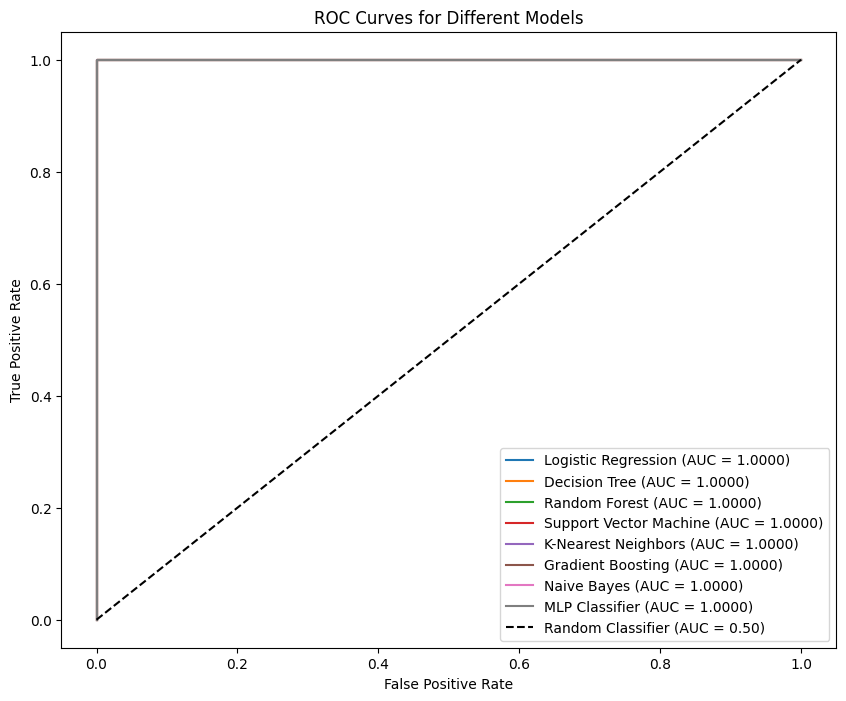

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    except AttributeError:
        print(f"Skipping {name} as it does not support predict_proba")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Create a list of tuples with model names and trained model objects
estimators = [(name, model) for name, model in trained_models.items()]

# Instantiate VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Train the VotingClassifier
voting_clf.fit(X_resampled, y_resampled)

# Evaluate the performance of the VotingClassifier on the test set
y_pred_ensemble = voting_clf.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])

print("Ensemble Model Performance:")
print(f"  Accuracy: {accuracy_ensemble:.4f}")
print(f"  Precision: {precision_ensemble:.4f}")
print(f"  F1-score: {f1_ensemble:.4f}")
print(f"  Confusion Matrix:\n{cm_ensemble}")
print(f"  ROC AUC Score: {roc_auc_ensemble:.4f}")

Ensemble Model Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[75  0]
 [ 0 85]]
  ROC AUC Score: 1.0000


In [44]:
import tensorflow as tf
print(tf.__version__)  # Check TensorFlow version
import keras
print(keras.__version__)  # Check Keras version


2.19.0
3.10.0


In [45]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


In [46]:
import joblib

# Save the scikit-learn model
joblib.dump(model, 'my_model.joblib')

['my_model.joblib']

In [57]:
from tensorflow import keras

loaded_model = keras.models.load_model('my_model.keras')


In [58]:
from google.colab import files
files.download('my_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save the scikit-learn model
joblib.dump(model, 'my_model.joblib')